In [15]:
import numpy as np # thư viện tính toán toán học
import matplotlib.pyplot as plt # visualize data sử dụng đồ thị
from scipy.spatial.distance import cdist # Hỗ trợ tính khoảng cách

In [16]:
# Đọc dữ liệu từ file txt vào một mảng numpy
file_path = 'data.txt'  # Thay đổi đường dẫn đến file txt của bạn
data = X = np.loadtxt(file_path, delimiter=',')
n_cluster = 3

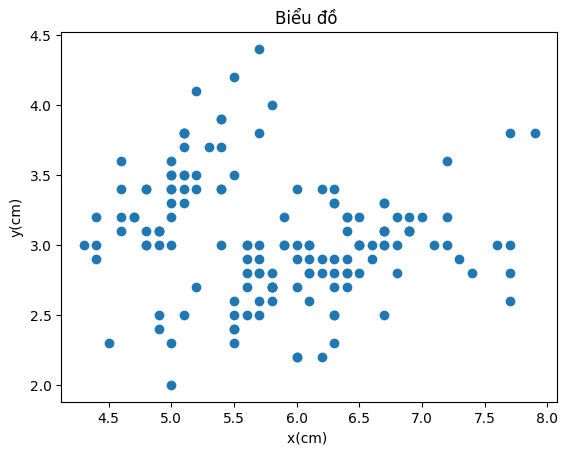

In [17]:
# Tách các giá trị của gen thành hai mảng riêng biệt (tạo các mảng riêng cho cột đầu tiên và cột thứ hai)
x = data[:, 0]
y = data[:, 1]

# Vẽ biểu đồ scatter plot
plt.scatter(x, y)
plt.xlabel('x(cm) ')
plt.ylabel('y(cm)')
plt.title('Biểu đồ ')
plt.show()

In [4]:
#Xác định tâm cho các clusters
def kmeans_init_centers(X, n_cluster):
  # random k index beetween 0 and shape(X) without duplicate index.
  # Then return X[index] as cluster
  return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

In [5]:
#xác định các nhãn
def kmeans_predict_labels(X, centers):
  D = cdist(X, centers)
  # return index of the closest center
  return np.argmin(D, axis = 1)

In [6]:
#cập nhật lại vị trí các tâm
def kmeans_update_centers(X, labels, n_cluster):
  centers = np.zeros((n_cluster, X.shape[1]))
  for k in range(n_cluster):
    # collect all points assigned to the k-th cluster
    Xk = X[labels == k, :]
    # take average
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers

In [7]:
#kiểm tra tính hội tụ
def kmeans_has_converged(centers, new_centers):
  # return True if two sets of centers are the same
  return (set([tuple(a) for a in centers]) ==
      set([tuple(a) for a in new_centers]))

In [8]:
# Hàm này dùng để vẽ dữ liệu lên đồ thị
# Random color chỉ làm việc với k <= 4
# Nếu bạn thay đổi k > 4, hãy sửa lại phần random color nhé
# Chỉ sử dụng trong bài toán này thôi nhé.
def kmeans_visualize(X, centers, labels, n_cluster, title):
  plt.xlabel('x(cm)') # label trục x
  plt.ylabel('y(cm)') # label trục y
  plt.title(title) # title của đồ thị
  plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] # danh sách các màu hỗ trợ

  for i in range(n_cluster):
    data = X[labels == i] # lấy dữ liệu của cụm i
    plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize = 4, label = 'cluster_' + str(i)) # Vẽ cụm i lên đồ thị
    plt.plot(centers[i][0], centers[i][1],  plt_colors[i+4] + 'o', markersize = 10, label = 'center_' + str(i)) # Vẽ tâm cụm i lên đồ thị
  plt.legend() # Hiện bảng chú thích
  plt.show()

In [9]:
#thuật toán k-means
def kmeans(init_centes, init_labels, X, n_cluster):
  centers = init_centes
  labels = init_labels
  times = 0
  while True:
    labels = kmeans_predict_labels(X, centers)
    kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' + str(times + 1))
    new_centers = kmeans_update_centers(X, labels, n_cluster)
    if kmeans_has_converged(centers, new_centers):
      break
    centers = new_centers
    kmeans_visualize(X, centers, labels, n_cluster, 'Update center possition at time = ' + str(times + 1))
    times += 1
  return (centers, labels, times)

[[5.9 3.2]
 [4.6 3.6]
 [5.8 2.7]]


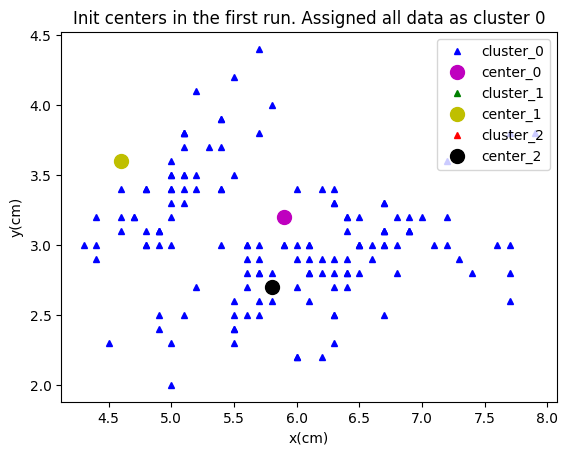

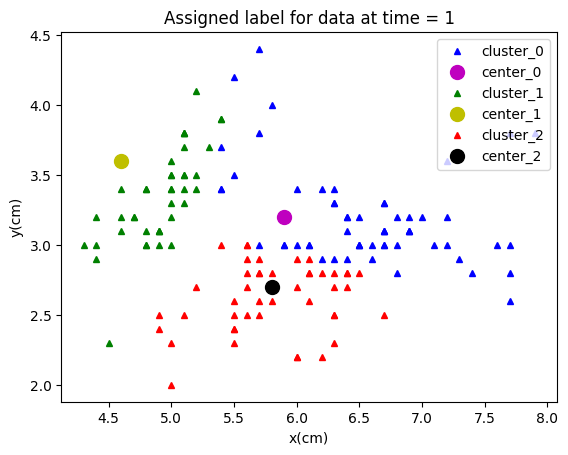

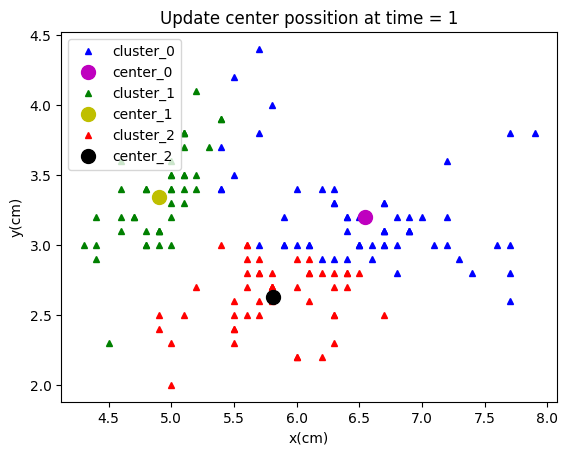

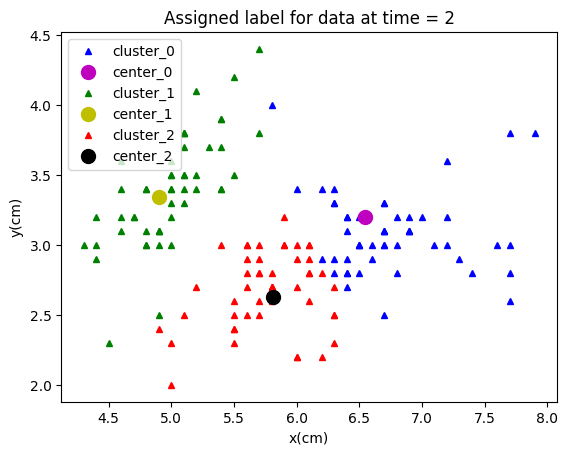

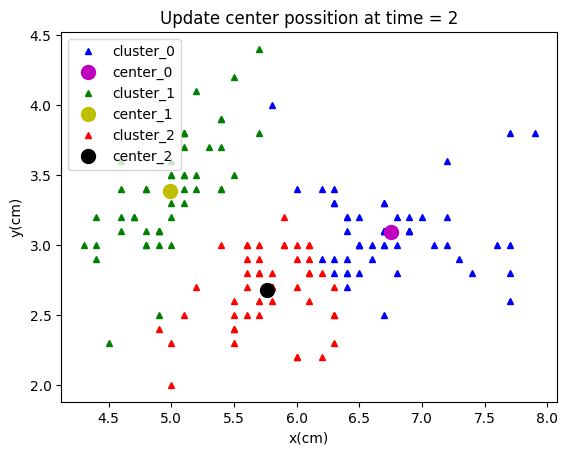

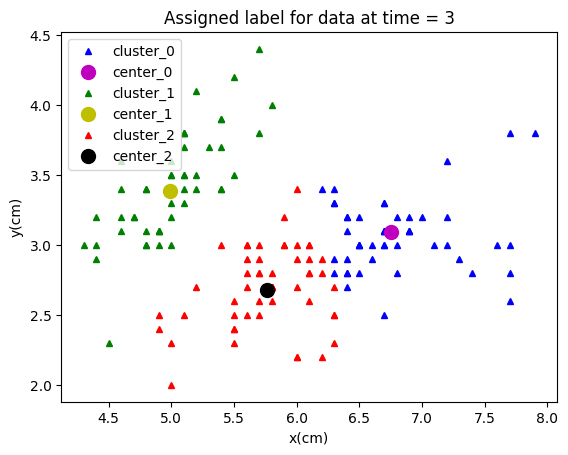

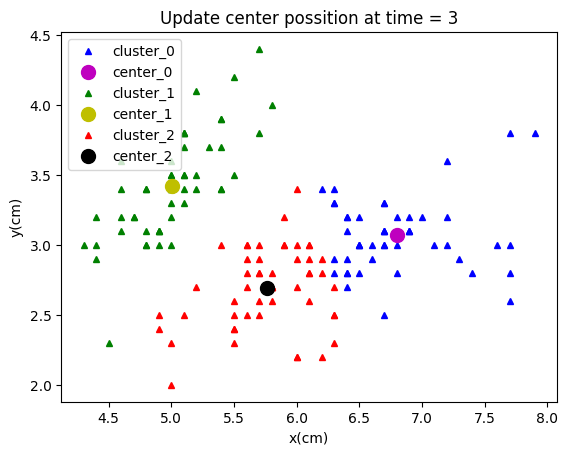

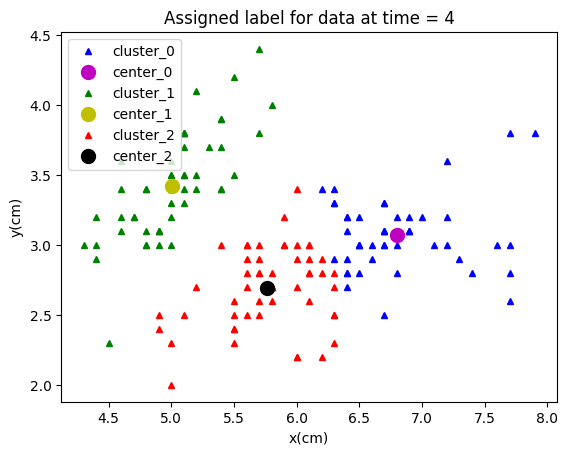

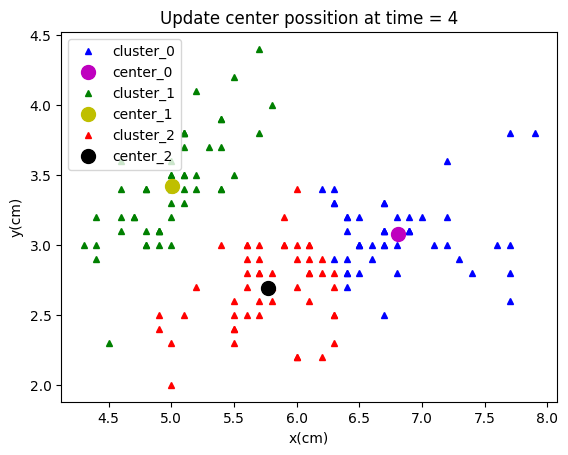

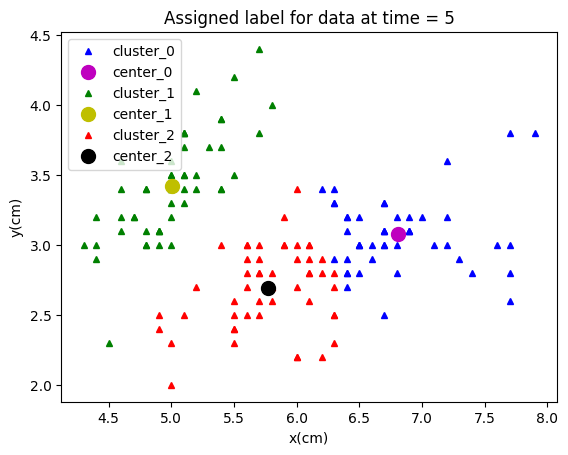

Done! Kmeans has converged after 4 times


In [10]:
init_centers = kmeans_init_centers(X, n_cluster)
print(init_centers) # In ra tọa độ khởi tạo ban đầu của các tâm cụm
init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, n_cluster, 'Init centers in the first run. Assigned all data as cluster 0')
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)

print('Done! Kmeans has converged after', times, 'times')

In [18]:
print(centers)

[[6.81276596 3.07446809]
 [5.006      3.418     ]
 [5.77358491 2.69245283]]


In [19]:
# Tạo danh sách các điểm cho mỗi cluster
cluster_points = [[] for _ in range(n_cluster)]
for i, label in enumerate(labels):
    cluster_points[label].append(data[i])
# In ra các điểm trong mỗi cluster
for i, points in enumerate(cluster_points):
    print(f"Các điểm trong cluster {i + 1}:")
    for point in points:
        print(point)
    print()

Các điểm trong cluster 1:
[7.  3.2]
[6.4 3.2]
[6.9 3.1]
[6.5 2.8]
[6.3 3.3]
[6.6 2.9]
[6.7 3.1]
[6.4 2.9]
[6.6 3. ]
[6.8 2.8]
[6.7 3. ]
[6.7 3.1]
[6.3 3.3]
[7.1 3. ]
[6.3 2.9]
[6.5 3. ]
[7.6 3. ]
[7.3 2.9]
[6.7 2.5]
[7.2 3.6]
[6.5 3.2]
[6.4 2.7]
[6.8 3. ]
[6.4 3.2]
[6.5 3. ]
[7.7 3.8]
[7.7 2.6]
[6.9 3.2]
[7.7 2.8]
[6.7 3.3]
[7.2 3.2]
[6.4 2.8]
[7.2 3. ]
[7.4 2.8]
[7.9 3.8]
[6.4 2.8]
[7.7 3. ]
[6.3 3.4]
[6.4 3.1]
[6.9 3.1]
[6.7 3.1]
[6.9 3.1]
[6.8 3.2]
[6.7 3.3]
[6.7 3. ]
[6.5 3. ]
[6.2 3.4]

Các điểm trong cluster 2:
[5.1 3.5]
[4.9 3. ]
[4.7 3.2]
[4.6 3.1]
[5.  3.6]
[5.4 3.9]
[4.6 3.4]
[5.  3.4]
[4.4 2.9]
[4.9 3.1]
[5.4 3.7]
[4.8 3.4]
[4.8 3. ]
[4.3 3. ]
[5.8 4. ]
[5.7 4.4]
[5.4 3.9]
[5.1 3.5]
[5.7 3.8]
[5.1 3.8]
[5.4 3.4]
[5.1 3.7]
[4.6 3.6]
[5.1 3.3]
[4.8 3.4]
[5. 3.]
[5.  3.4]
[5.2 3.5]
[5.2 3.4]
[4.7 3.2]
[4.8 3.1]
[5.4 3.4]
[5.2 4.1]
[5.5 4.2]
[4.9 3.1]
[5.  3.2]
[5.5 3.5]
[4.9 3.1]
[4.4 3. ]
[5.1 3.4]
[5.  3.5]
[4.5 2.3]
[4.4 3.2]
[5.  3.5]
[5.1 3.8]
[4.8 3. ]
[5.1 3.8]
[4.6 3.2]